In [1]:
import pandas as pd
import warnings
# ИСПОЛЬЗУЮ ТОЛЬКО ЧТОБЫ ВЗЯТЬ ЦВЕТА ДЛЯ КРАСИВОГО ВЫВОДА
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Загрузка данных
agents_df = pd.read_csv('resources/pandas/travel_agents.csv', delimiter=';')
travels_df = pd.read_csv('resources/pandas/travels.csv', delimiter=';')
sales_df = pd.read_csv('resources/pandas/sale_of_tour_packages.csv', delimiter=';')

**1. Найти дату, когда было отправлено в путешествие максимальное количество человек.**

In [3]:
# Объединение данных
merged_df = pd.merge(sales_df, travels_df, on='ID тура')
merged_df = pd.merge(merged_df, agents_df, on='ID туроператора')

# Найдём дату с максимальным количеством путешественников
max_date = merged_df.groupby('Дата')['Количество проданных путёвок'].sum().idxmax()
print(f"Дата с максимальным количеством путешественников: {max_date}")

Дата с максимальным количеством путешественников: 08.03.2022


**2. Построить круговую диаграмму, отображающую общую стоимость путёвок и стоимость путёвок по каждому городу, которые были проданы туроператором "Горизонт".**

In [94]:
color_pallete = sns.color_palette("muted", 32)
color_pallete

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215),
 (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215),
 (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215),
 (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726)]

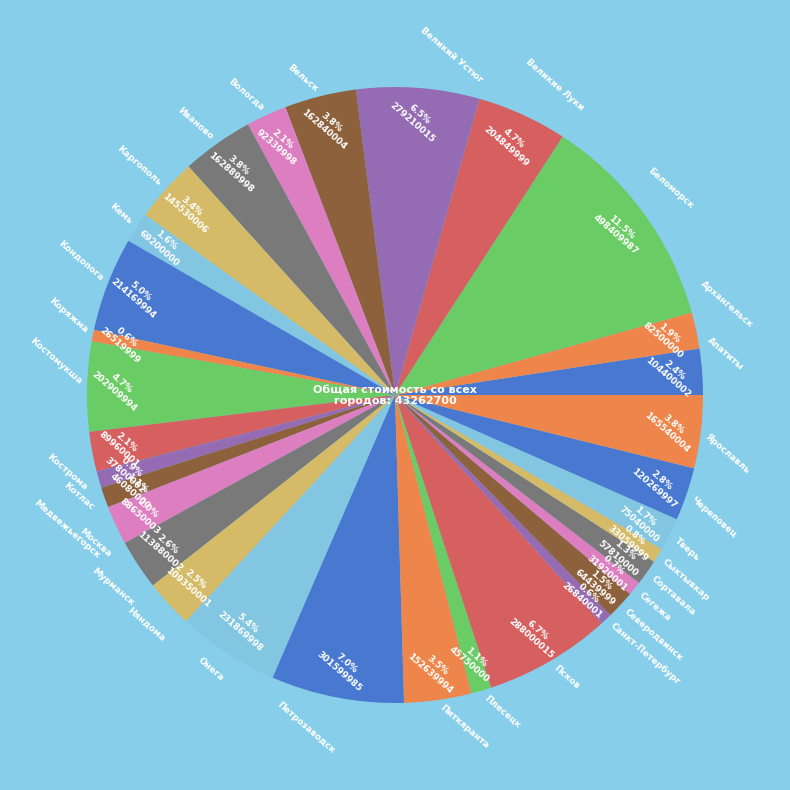

In [95]:
#посчитали общую стоимость конкретного тура за все продажи
merged_df['Общая стоимость'] = merged_df['Стоимость, на 1 чел'] * merged_df['Количество проданных путёвок']

# Построение круговой диаграммы для общей стоимости путёвок
horizon_sales = merged_df[merged_df['Название'] == 'Горизонт']
horizon_city_sales = horizon_sales.groupby('Город')['Общая стоимость'].sum()

# Круговая диаграмма
horizon_total_cost_all_cities = horizon_sales['Общая стоимость'].sum()
ax = horizon_city_sales.plot.pie(
    autopct=lambda x: "{:.1f}%\n{:.0f}".format(x, x * horizon_total_cost_all_cities),
    figsize=(10, 10),
    rotatelabels=True,
    labeldistance=1.01,
    ylabel="",
    fontsize=6.5,
    textprops={"color": "white", "fontweight": "bold", "rotation": -41},
    colors=color_pallete,
    pctdistance=0.9,
)
ax.text(
    0.5,
    0.5,
    f"Общая стоимость со всех\nгородов: {horizon_total_cost_all_cities}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax.transAxes,
    fontsize=8,
    color="white",
    fontweight="bold",
)
ax.get_figure().set_facecolor('skyblue')
ax.get_figure().show()

**3. Построить гистограмму, показывающую градацию туров по стоимости путешествия.**

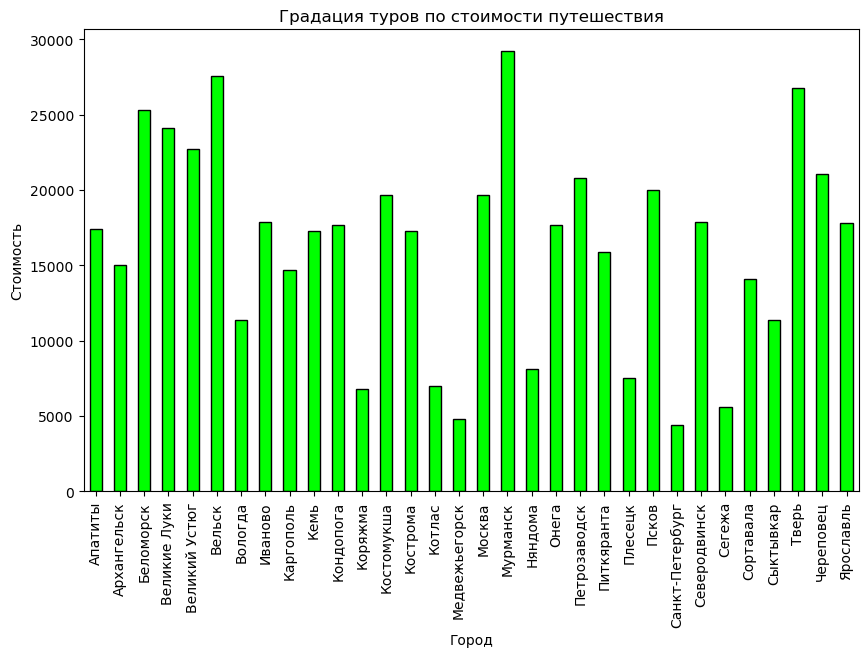

In [75]:
ax = (
    travels_df.groupby("Город")["Стоимость, на 1 чел"]
    .sum()
    .plot(kind="bar", figsize=(10, 6), color="lime", edgecolor="black")
)

# Настройка заголовка и осей
ax.set_title("Градация туров по стоимости путешествия")
ax.set_xlabel("Город")
ax.set_ylabel("Стоимость")

# Показать гистограмму
ax.get_figure().show()